In [96]:
import sys
sys.path.append("..")
import datetime

from src.helper import make_ts

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 3.1 Simple forecasting methods

### Average Method:

The forecasts of all future values are equal to the average of the historical data:


$\hat{y}_{T+h|T}=\bar{y}=(y_{1}+..+y_{T})/T$

In [3]:
ts_df = make_ts('2000',20)

In [4]:
ts_df.head()

,Observation
Date,
2000-01-01,68.094189
2001-01-01,9.832942
2002-01-01,33.767775
2003-01-01,63.871356
2004-01-01,7.727545


In [5]:
def average_forecast(y, h):
    """
    y = time series index of pandas data frame
    h = forecast horizon
    
    TODO: Move to helper.py. 
    """
    ts = pd.DataFrame(pd.date_range(
                                        str(ts_df.index[-1] + datetime.timedelta(days=365)), 
                                        periods = h, 
                                        freq=pd.infer_freq(y.index)
                                        ), 
                      columns = ['Date']
                     )
    ts['Forecast_AVG'] = y['Observation'].mean()
    ts.set_index('Date', inplace = True)
    return ts

In [6]:
forecast_avg = average_forecast(ts_df, 10)

## Naïve method

The forecasts of all future values are equal to the average of the historical data:


$\hat{y}_{T+h|T}=y_{T}$

In [7]:
def naive_forecast(y, h):
    """
    y = time series index of pandas data frame
    h = forecast horizon
    
    TODO: Move to helper.py. 
    """
    ts = pd.DataFrame(pd.date_range(
                                        str(ts_df.index[-1] + datetime.timedelta(days=365)), 
                                        periods = h, 
                                        freq=pd.infer_freq(y.index)
                                        ), 
                      columns = ['Date']
                     )
    ts['Forecast_Naive'] = y['Observation'][-1]
    ts.set_index('Date', inplace = True)
    return ts

In [8]:
forecast_naive = naive_forecast(ts_df, 10)

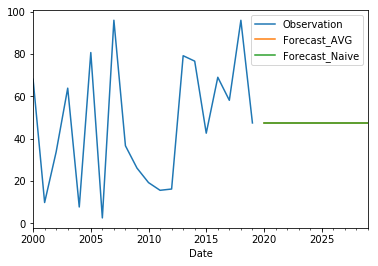

In [9]:
fig, ax = plt.subplots()
ts_df.plot(ax = ax)
forecast_avg.plot(ax = ax)
forecast_naive.plot(ax=ax)

In [138]:
seasonal = make_ts("2000", 12*20, 'M')

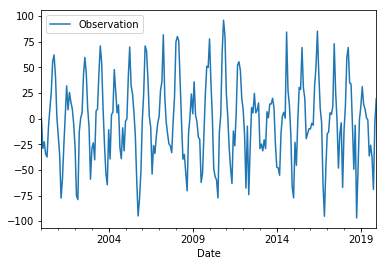

In [139]:
seasonal.plot()

In [140]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [150]:
def s_naive_forecast(y, h):
    """
    y = time series index of pandas data frame
    h = forecast horizon
    
    TODO: Move to helper.py. 
    """
    ts = pd.DataFrame(pd.date_range(
                                        str(ts_df.index[-1] + datetime.timedelta(days=365)), 
                                        periods = h, 
                                        freq=pd.infer_freq(y.index)
                                        ), 
                      columns = ['Date']
                     )
    history = [x for x in y['Observation']]
    prediction = []
    
    for i in range(periods):
        predict = float(SARIMAX(history,
                            order = (0,0,0),
                            seasonal_order=(0,1,0,12)).fit(disp=0).forecast()[0]
                       )
    
        history.append(predict)
        prediction.append(predict)
    prediction = pd.Series(prediction)
    ts = pd.concat((ts,prediction), axis = 1)
    ts.columns = ['Date', 'Forecast']
    ts.set_index('Date', inplace = True)
    return ts

In [151]:
s_naive =s_naive_forecast(seasonal, 12*5)

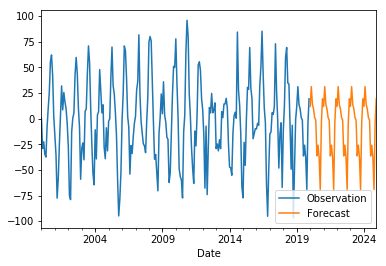

In [152]:
fig, ax = plt.subplots()
seasonal.plot(ax = ax)
s_naive.plot(ax = ax)